In [304]:
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns

path1 = 'raw_data/city_data.csv'
path2 = 'raw_data/ride_data.csv'

city_dat = pd.read_csv(path1)
ride_dat = pd.read_csv(path2)

city_dat.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [305]:
#average fare ($) per city. The groupby auto sorts into alphabet. order by city 
avg_fare = ride_dat.groupby('city').mean()['fare']

#number of rides per city, should make into series based on ride_id before using elsewhere
ride_ct = ride_dat.groupby('city').count()['ride_id']

#number of drivers per city, returns series of numbers only, sorted by city_dat index number  
driver_ct = city_dat.groupby('city')['driver_count'].sum()

#group by city types. using groupby.sum() to get string values
    #two values duplicate, so (sum of those values) == SuburbanSuburban
city_type = city_dat.groupby('city')['type'].sum()

pyber_df = pd.DataFrame([avg_fare, ride_ct, driver_ct, city_type])
pyber_df = pyber_df.T #transpose columns due to having a column for each city
pyber_df = pyber_df.rename(columns={'ride_id':'ride_count'})

pyber_df.head()

,fare,ride_count,driver_count,type
city,,,,
Alvarezhaven,23.9287,31,21,Urban
Alyssaberg,20.6096,26,67,Urban
Anitamouth,37.3156,9,16,Suburban
Antoniomouth,23.625,22,21,Urban
Aprilchester,21.9816,19,49,Urban


In [306]:
#Finding duplicate city entry in initial read_csv variable city_dat
#Duplicate city == 'Port James'.  
city_dat[city_dat['city'].duplicated(keep=False)]

#get rid of 'SuburbanSuburban' type in created dataframe that was created when duplicate city entries were summed
for i, row in pyber_df.iterrows():
    if row['type']=='SuburbanSuburban':
        row['type']='Suburban'
        

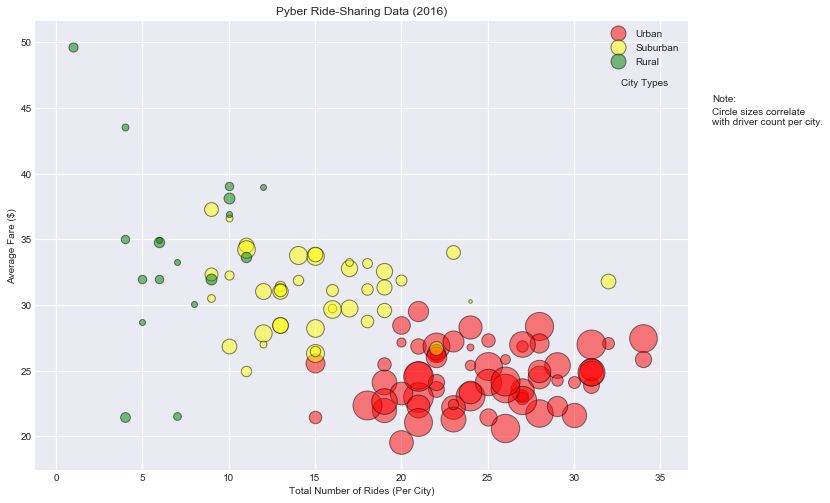

In [307]:
#*** bubbleplot of Average Fare ($) Per City, Total Number of Rides Per City, Total Number of Drivers Per City,
# and City Type (Urban, Suburban, Rural) 
#***
pyber_rural = pyber_df[pyber_df.type == 'Rural']
pyber_sub = pyber_df[pyber_df.type == 'Suburban']
pyber_urb = pyber_df[pyber_df.type == 'Urban']

#plot using plt.scatter, scaling each bubble by value correlating with driver count
fig, ax = plt.subplots()
def bubblePlot(df, color):
    for index, row in df.iterrows():
        plot = plt.scatter(x=row['ride_count'], y=row['fare'], s=row['driver_count']*12,\
        edgecolor='black', color=color, linewidth=1, data=df, alpha=0.5)
    return plot

# Make bubblePlot
    # for each type of area in pyber_df, plot different color
bubblePlot(pyber_urb, 'red')
bubblePlot(pyber_sub, 'yellow')
bubblePlot(pyber_rural, 'g')
        
#turn on axes grid 
ax.grid(linestyle='-', linewidth=1.25)
# set figure size == size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.set_style('dark')

#titles
plt.title('Pyber Ride-Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# setting up the legend, since the default for loop bubblePlot's legend is messed up 
urban_handle = mlines.Line2D([], [], color='red', marker='o', markersize=15, label='Urban',\
                alpha=0.5, ls='', mec='black')
suburb_handle = mlines.Line2D([], [], color='yellow', marker='o', markersize=15, label='Suburban',\
                alpha=0.5, ls='', mec='black')
rural_handle = mlines.Line2D([], [], color='g', marker='o', markersize=15, label='Rural',\
                alpha=0.5, ls='', mec='black')
plt.legend(handles=[urban_handle, suburb_handle, rural_handle])

#annotation, adding to the legend
ax.annotate('City Types', xy=[32.75, 46.5], xytext=(32.75, 46.75))
# note is outside the graph. Make sure xy=[] coordinates are within graph, then xytext can be desired location 
ax.annotate('Note:', xy=[32.75, 45.5], xytext=(38, 45.5))
ax.annotate('Circle sizes correlate', xy=[32.75, 45.5], xytext=(38, 44.5))
ax.annotate('with driver count per city.', xy=[32.75, 45.5], xytext=(38, 43.75))

plt.show()


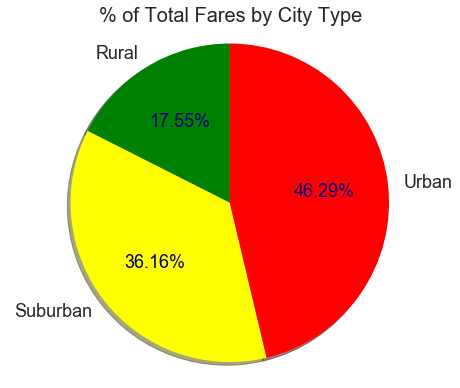

,fare
type,
Rural,615.728572
Suburban,1268.627391
Urban,1623.863390


In [308]:
# *** piechart: % of Total Fares by City Type ***

#get series of percent based on city type
type_group = pyber_df.groupby('type').sum()

#plotting the pie
fig, ax = plt.subplots()
#getting list of color for each city type
color_ls = ['g', 'yellow', 'red']
_, texts, autotexts = plt.pie(type_group['fare'], autopct='%1.2f%%', labels=type_group.index,\
                              colors=color_ls , shadow=True, startangle=90)
# changing size of autopct and labels
for autotext in autotexts:
    autotext.set_color('navy')
    autotext.set_fontsize(18)
for text in texts:
    text.set_fontsize(18)
    
#adding titles & formatting
plt.title('% of Total Fares by City Type').set_fontsize(20)
plt.axis('equal')
fig.set_size_inches(8, 6.5)
plt.show()
pd.DataFrame(type_group['fare'])

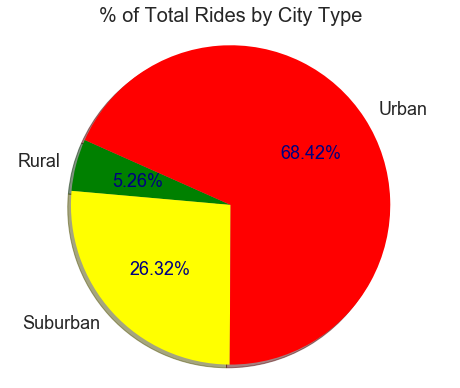

,ride_count
type,
Rural,125
Suburban,625
Urban,1625


In [309]:
# *** % of Total Rides by City Type ***

#plotting the pie
fig, ax = plt.subplots()
color_ls = ['g', 'yellow', 'red']
_, texts, autotexts = plt.pie(type_group['ride_count'], autopct='%1.2f%%', labels=type_group.index, colors=color_ls,\
        shadow=True, startangle=156)
# changing size of autopct and labels
for autotext in autotexts:
    autotext.set_color('navy')
    autotext.set_fontsize(18)
for text in texts:
    text.set_fontsize(18)
    
#adding titles & formatting
plt.title('% of Total Rides by City Type').set_fontsize(20)
plt.axis('equal')
fig.set_size_inches(8, 6.5)
plt.show()
pd.DataFrame(type_group['ride_count'])

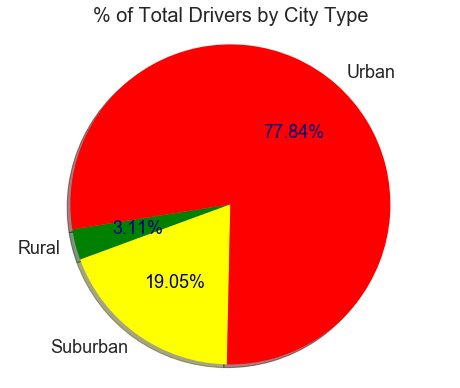

,driver_count
type,
Rural,104
Suburban,638
Urban,2607


In [310]:
# *** % of Total Drivers by City Type ***

#plotting the pie
fig, ax = plt.subplots()
color_ls = ['g', 'yellow', 'red']
_, texts, autotexts = plt.pie(type_group['driver_count'], autopct='%1.2f%%', labels=type_group.index, colors=color_ls,\
        shadow=True, startangle=189)
# changing size of autopct and labels
for autotext in autotexts:
    autotext.set_color('navy')
    autotext.set_fontsize(18)
for text in texts:
    text.set_fontsize(18)
    
#adding titles & formatting
plt.title('% of Total Drivers by City Type').set_fontsize(20)
plt.axis('equal')
fig.set_size_inches(8, 6.5)
plt.show()
pd.DataFrame(type_group['driver_count'])